In [50]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Final


In [51]:
num_experiments: Final[int] = 1000
bins: Final[int] = 5

Модель логистического роста.


In [52]:
a: Final[float] = 0.5
b: Final[int] = 2
n: Final[int] = 1000

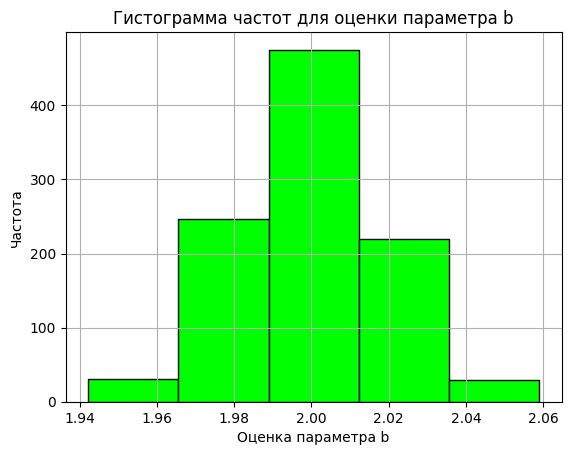

Интервал		Частота
[1.9422, 1.9656)	31
[1.9656, 1.9889)	246
[1.9889, 2.0122)	475
[2.0122, 2.0356)	219
[2.0356, 2.0589)	29


In [53]:
b_list = np.zeros(num_experiments)

for i in range(num_experiments):
    x = np.zeros(n)
    x[0] = a
    for j in range(1, n):
        x[j] = b * x[j - 1] * (1 - x[j - 1])

    epsilon = np.random.uniform(low=-1 / 4, high=1 / 4, size=n)
    # epsilon.sort()

    y = x + epsilon
    c = np.var(epsilon)
    b_line = np.mean(y) / (np.mean(y) - (np.mean(y**2) - c))

    b_list[i] = b_line


plt.hist(b_list, bins=5, edgecolor="black", color="lime")
plt.title("Гистограмма частот для оценки параметра b")
plt.xlabel("Оценка параметра b")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


hist, bin_edges = np.histogram(b_list, bins=bins)

print("Интервал\t\tЧастота")
for i in range(bins):
    print(f"[{bin_edges[i]:.4f}, {bin_edges[i + 1]:.4f})\t{hist[i]}")